# CSG Result Analysis

## Introduction

This notebook is a breakdown of results gathered from running tests on the implementation of the Combinatorial Geometry method in the OpenRT library. The following sections breakdown the way the tests were conducted and also the flow of the rest of this notebook.


### The 3 Operations

By definition, constructive solid geometry is a method which allows to construct complex geometries using primitive operation and boolean set operations (Union, Difference, Intersection). Therefore, every test requires us to test each of these operations on the same exact load. In theory, the operation itself shouldn't have a drastic impact on the performance of the algorithm.

### The 3 Algorithms

There are 3 variants of the CSG method implemented in OpenRT. The first is the naive and brute force implementation which we refer to as _NaiCSG_. The second is a variant that uses a Binary Space Partition tree in order to solve the visible surface problem but still naivly finds intersections inside the combinatorial geometry, which we will refer to as _BinCSG_. Lastly, we'll introduce our optimized algorithm which uses a binary space partition tree on the outside (solving the visible surface problem) and also inside each composite geometry in order to direct the rays towards the correct geometries, which we will refer to as _OptiCSG_. Every algorithm is checked for each operation - meaning a total of 9 tests are conducted.

### Notebook Breakdown

There are a total of 4 sections (the first being this introduction). Section 2 focuses entirely on extracting data for each alogrithm and only comparing the time of the different operations. Section 3 is focused on processing the data and comparing the mean time of each algorithm to the other. The last section works on modeling the time complexities to close representations and finally drawing conclusion on the performance.  

### Hardware Specifications

All tests were ran on a Macbook Pro 13" 2017

- **Processor:** 2,3 GHz Dual-Core Intel Core i5
- **Memory:** 8 GB 2133 MHz LPDDR3
- **Graphics Card:** Intel Iris Plus Graphics 640 1536 MB

## Individual Algorithms

### NaiCSG


The naive algorithm essentially by brute-forcing its way through the visible-surface problem. For each ray, it iterates over all geometries in the scene and picks the closest intersection. Therefore if a scene contains 100 geometries and we have a 200x200px image. A total of **4.000.000** intersections will be checked before the image is computed. 


In [1]:
# setting up notebook all modules
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from functools import reduce

In [2]:
df1 = pd.read_csv('tests_pdp_intersection.txt')
df2 = pd.read_csv('tests_pdp_union.txt')
df3 = pd.read_csv('tests_pdp_difference.txt')

In [3]:
df_normal = pd.concat([df1, df2, df3], axis=1)
df_normal.columns = ["Triangle Number", "Intersection Time", "tris2", "Union Time", "tris3", "Difference Time"]
df_normal = df_normal.drop(columns=['tris2', 'tris3'])
col = df_normal.loc[: , "Intersection Time":"Difference Time"]
df_normal['Normal Mean Time'] = col.mean(axis=1)

In [4]:
df_normal

,Triangle Number,Intersection Time,Union Time,Difference Time,Normal Mean Time
0,56,9584,10005,10244,9.944333e+03
1,96,14842,13504,17231,1.519233e+04
2,108,19609,15103,27751,2.082100e+04
3,160,23874,21834,34702,2.680333e+04
4,176,24185,23850,34382,2.747233e+04
...,...,...,...,...,...
84,16016,2358169,2185245,2616391,2.386602e+06
85,16560,2325892,2249876,2661334,2.412367e+06
86,16740,2468460,2281268,2728314,2.492681e+06
87,17296,2827311,2477078,2849404,2.717931e+06


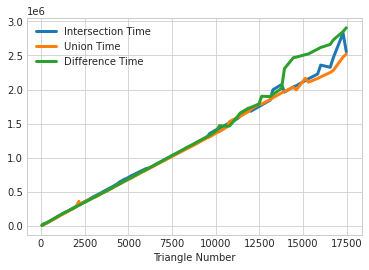

In [5]:
df_normal.plot(x ='Triangle Number', y=['Intersection Time', 'Union Time', 'Difference Time'], kind = 'line', lw=3)
plt.show()

### BinCSG

In [6]:
bsp1 = pd.read_csv('tests_bsp_pdp_intersection.txt')
bsp2 = pd.read_csv('tests_bsp_pdp_union.txt')
bsp3 = pd.read_csv('tests_bsp_pdp_difference.txt')

In [7]:
df_bsp = pd.concat([bsp1, bsp2, bsp3], axis=1)
df_bsp.columns = ["Triangle Number", "Intersection Time", "tris2", "Union Time", "tris3", "Difference Time"]
df_bsp = df_bsp.drop(columns=['tris2', 'tris3'])
col2 = df_bsp.loc[: , "Intersection Time":"Difference Time"]
df_bsp['BSP Mean Time'] = col2.mean(axis=1)

In [8]:
df_bsp

,Triangle Number,Intersection Time,Union Time,Difference Time,BSP Mean Time
0,56,787,1269.0,1208,1.088000e+03
1,96,1410,2160.0,4186,2.585333e+03
2,108,1531,2332.0,3368,2.410333e+03
3,160,1909,3170.0,5206,3.428333e+03
4,176,2036,3380.0,3362,2.926000e+03
...,...,...,...,...,...
194,79596,912189,1549889.0,1145179,1.202419e+06
195,80800,927021,1662735.0,1149373,1.246376e+06
196,81200,939500,1622445.0,1167704,1.243216e+06
197,82416,967861,1593039.0,1710673,1.423858e+06


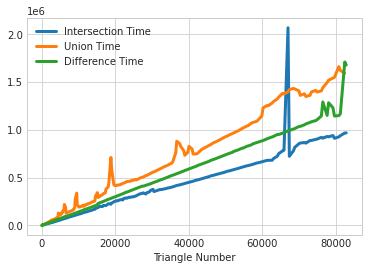

In [9]:
df_bsp.plot(x ='Triangle Number', y=['Intersection Time', 'Union Time', 'Difference Time'], kind = 'line', lw=3)
plt.show()

### OptimCSG

In [10]:
optim1 = pd.read_csv('tests_bsp_optim_intersection.txt')
optim2 = pd.read_csv('tests_bsp_optim_union.txt')

In [11]:
df_optim = pd.concat([optim1, optim2], axis=1)
df_optim.columns = ["Triangle Number", "Intersection Time", "tris2", "Union Time"]
df_optim = df_optim.drop(columns=['tris2'])
col3 = df_optim.loc[: , "Intersection Time":"Union Time"]
df_optim['Optim Mean Time'] = col3.mean(axis=1)

In [12]:
df_optim

,Triangle Number,Intersection Time,Union Time,Optim Mean Time
0,56,1005,943,974.0
1,96,1065,1263,1164.0
2,108,859,1073,966.0
3,160,1019,1262,1140.5
4,176,927,1175,1051.0
...,...,...,...,...
194,79596,1415,1691,1553.0
195,80800,1467,1728,1597.5
196,81200,1434,1705,1569.5
197,82416,1550,1600,1575.0


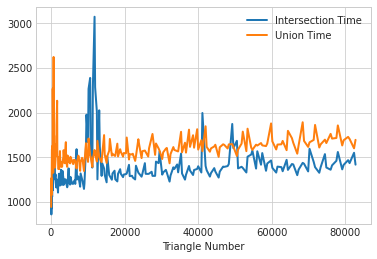

In [13]:
df_optim.plot(x ='Triangle Number', y=['Intersection Time', 'Union Time'], kind = 'line', lw=2)
plt.show()

## Algorithm Comparasion

In [14]:
df_comp = pd.concat([df_normal["Triangle Number"], df_normal["Normal Mean Time"], df_bsp[0:len(df_normal.index)]["BSP Mean Time"], df_optim[0:len(df_normal.index)]["Optim Mean Time"]], axis=1)
df_comp['Optim Rolling Mean'] = df_comp['Optim Mean Time'].rolling(7).mean()
df_comp['BSP Rolling Mean'] = df_comp['BSP Mean Time'].rolling(7).mean()
df_comp['Normal Rolling Mean'] = df_comp['Normal Mean Time'].rolling(7).mean()


In [15]:
df_comp

,Triangle Number,Normal Mean Time,BSP Mean Time,Optim Mean Time,Optim Rolling Mean,BSP Rolling Mean,Normal Rolling Mean
0,56,9.944333e+03,1088.000000,974.0,NaN,NaN,NaN
1,96,1.519233e+04,2585.333333,1164.0,NaN,NaN,NaN
2,108,2.082100e+04,2410.333333,966.0,NaN,NaN,NaN
3,160,2.680333e+04,3428.333333,1140.5,NaN,NaN,NaN
4,176,2.747233e+04,2926.000000,1051.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
84,16016,2.386602e+06,250487.666667,1496.5,1461.857143,232783.571429,2.240101e+06
85,16560,2.412367e+06,256954.666667,1382.5,1447.428571,240253.238095,2.287473e+06
86,16740,2.492681e+06,264765.666667,1428.5,1428.500000,248032.904762,2.332296e+06
87,17296,2.717931e+06,270377.000000,1433.0,1430.928571,253782.333333,2.409780e+06


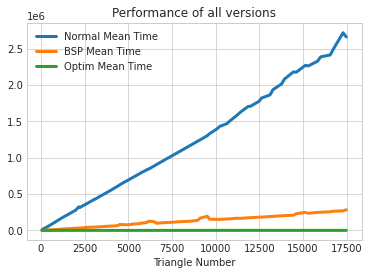

In [16]:
df_comp.plot(x="Triangle Number", y=["Normal Mean Time", "BSP Mean Time", "Optim Mean Time"], kind="line", lw=3)
plt.title('Performance of all versions')
plt.show()

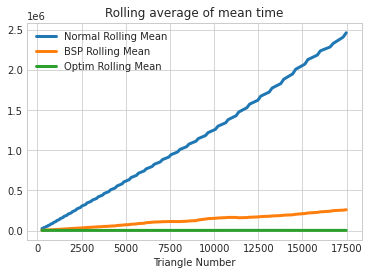

In [17]:
df_comp.plot(x="Triangle Number", y=["Normal Rolling Mean", "BSP Rolling Mean", "Optim Rolling Mean"], kind="line", lw=3)
plt.title("Rolling average of mean time")
plt.show()

## Time Complexity Estimation

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ac4dee6-3593-4df6-9be3-dcc2fad09905' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>